In [2]:
import torch
import torch.nn as nn 
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt

In [15]:
#Defining hyperparameters
input_size = 784
hidden_size = 1000
num_classes = 10
num_epoch = 10
learning_rate = 0.001
batch_size = 100

In [4]:
#Importing Dataset
train_dataset = torchvision.datasets.MNIST(root = './data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root = './data', train=False, transform=transforms.ToTensor())

0.4%

31.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



102.8%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




1.7%

58.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
#Dataloader
train_loader = torch.utils.data.DataLoader(dataset= train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset= test_dataset, batch_size = batch_size, shuffle = False)   

In [7]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


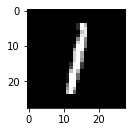

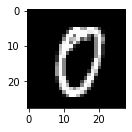

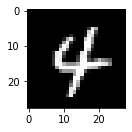

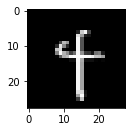

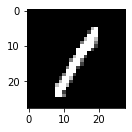

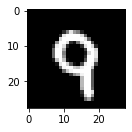

In [8]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap = 'gray')
    plt.show()

In [9]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out


In [10]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [12]:
#Loss and Optimizer
loss_fn  = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
#TrainingLoop
n_steps = len(train_loader)

for ep in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        #Reshaping Tensors
        images = images.reshape(-1, 28*28)
        
        #Forward Pass
        output = model(images)
        loss = loss_fn(output, labels)

        #Backward Pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch {ep +1} / {num_epoch}, step {i + 1} / {n_steps}, loss = {loss.item():.4f}')


epoch 1 / 10, step 100 / 600, loss = 0.0419
epoch 1 / 10, step 200 / 600, loss = 0.0306
epoch 1 / 10, step 300 / 600, loss = 0.0473
epoch 1 / 10, step 400 / 600, loss = 0.0269
epoch 1 / 10, step 500 / 600, loss = 0.0301
epoch 1 / 10, step 600 / 600, loss = 0.0638
epoch 2 / 10, step 100 / 600, loss = 0.0050
epoch 2 / 10, step 200 / 600, loss = 0.0112
epoch 2 / 10, step 300 / 600, loss = 0.0448
epoch 2 / 10, step 400 / 600, loss = 0.0358
epoch 2 / 10, step 500 / 600, loss = 0.1417
epoch 2 / 10, step 600 / 600, loss = 0.0363
epoch 3 / 10, step 100 / 600, loss = 0.0053
epoch 3 / 10, step 200 / 600, loss = 0.0460
epoch 3 / 10, step 300 / 600, loss = 0.0122
epoch 3 / 10, step 400 / 600, loss = 0.0207
epoch 3 / 10, step 500 / 600, loss = 0.0122
epoch 3 / 10, step 600 / 600, loss = 0.0012
epoch 4 / 10, step 100 / 600, loss = 0.0603
epoch 4 / 10, step 200 / 600, loss = 0.0360
epoch 4 / 10, step 300 / 600, loss = 0.0264
epoch 4 / 10, step 400 / 600, loss = 0.0440
epoch 4 / 10, step 500 / 600, lo

In [18]:
#Testing the Neural Network
with torch.no_grad():
    correct = 0
    samples = 0
    for images, labels in test_loader:
        #Reshaping the Tensors
        images = images.reshape(-1, 28*28)

        #Calculating Predictions
        outputs = model(images)
        _, pred = torch.max(outputs, 1) #Returns values and the index
        samples += labels.shape[0]
        correct += (pred == labels).sum().item()

        #Calculating Accuracy
    acc =  100.0 * correct / samples
    print(f'Accuracy = {acc}')

Accuracy = 98.04
